In [3]:
import pandas as pd

X_train = pd.read_csv(filepath_or_buffer='X_train.txt', header=None, sep=' ')
Y_train = pd.read_csv(filepath_or_buffer='y_train.txt', header=None, sep=' ')

X_test = pd.read_csv(filepath_or_buffer='X_test.txt', header=None, sep=' ')
Y_test = pd.read_csv(filepath_or_buffer='y_test.txt', header=None, sep=' ')

subject_id_train = pd.read_csv(filepath_or_buffer='subject_id_train.txt', header=None, sep=' ')
subject_id_test = pd.read_csv(filepath_or_buffer='subject_id_test.txt', header=None, sep=' ')

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn
import time

def build_classifier(x_train, y_train):
    start = time.time()
    result = RandomForestClassifier()
    result.fit(x_train, y_train.values.ravel())
    end = time.time()
    return result, end - start

def build_prediction(classifier, x_test):
    start = time.time()
    result = classifier.predict(x_test)
    end = time.time()
    return result, end - start

def show_confusion_matrix(name, y_test, y_pred):
    print(name,' confusion matrix:')
    cm = confusion_matrix(y_test, y_pred)
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.show()



Random Forest Pred  confusion matrix:


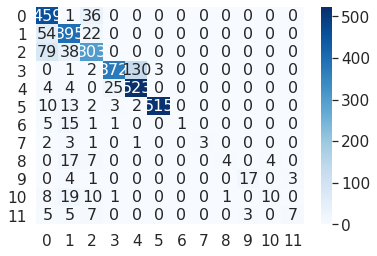

accuracy score for Random Forest prediction: 0.8251106894370651
cross value score for Random Forest Classifier: [0.79021879 0.80566281 0.82549903 0.79909852 0.8197038 ]
training time: 18.03189778327942 , testing time: 0.09163236618041992


In [50]:
#ACC - accurancy score
from sklearn.metrics import accuracy_score

def build_basic_analisys(x_train, x_test, y_train, y_test):
    classifier, classification_time = build_classifier(x_train, y_train)
    prediction, prediction_time = build_prediction(classifier, x_test)

    acc_score = accuracy_score(Y_test, prediction)
    show_confusion_matrix('Random Forest Pred', y_test, prediction)
    print("accuracy score for Random Forest prediction:", acc_score)

    cv_score = cross_val_score(classifier, x_train, y_train.values.ravel(), cv=5)
    print("cross value score for Random Forest Classifier:", cv_score)

    print('training time: {} , testing time: {}'.format(classification_time, prediction_time))
    
    result = {}
    result['name'] = 'basic'
    result['acc_score'] = acc_score
    result['cv_score'] = cv_score
    result['classification_time'] = classification_time
    result['prediction_time'] = prediction_time
    return result
    
basic_analysis = build_basic_analisys(X_train, X_test, Y_train, Y_test)

PCA Random Forest Pred  confusion matrix:


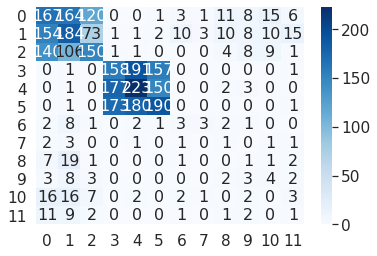

accuracy score for PCA Random Forest: 0.34123972169512967
cross value score for PCA Random Forest: [0.35456885 0.36808237 0.37089504 0.32388925 0.38055377]
training time: 1.8547897338867188 , testing time: 0.14762258529663086


In [46]:
#PCA - Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def build_pca_analysis(x_train, x_test, y_train, y_test):
#     sc = StandardScaler()
#     x_train_pca = sc.fit_transform(x_train)
#     x_test_pca = sc.transform(x_test)
    
    pca = PCA(n_components=1)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    pca_clf, pca_clf_time = build_classifier(x_train_pca, y_train)
    pca_pred, pca_pred_time = build_prediction(pca_clf, x_test_pca)
    
    
    show_confusion_matrix('PCA Random Forest Pred', y_test, pca_pred)
    acc_score = accuracy_score(y_test, pca_pred)
    print("accuracy score for PCA Random Forest:", acc_score)
    
    cv_score = cross_val_score(pca_clf, x_train_pca, y_train.values.ravel(), cv=5)
    print("cross value score for PCA Random Forest:", cv_score)

    print('training time: {} , testing time: {}'.format(pca_clf_time, pca_pred_time))

    result = {}
    result['name'] = 'pca'
    result['acc_score'] = acc_score
    result['cv_score'] = cv_score
    result['classification_time'] = pca_clf_time
    result['prediction_time'] = pca_pred_time
    return result
    
pca_analysis = build_pca_analysis(X_train, X_test, Y_train, Y_test)

In [60]:
def get_dim_reduction_results (results):
    data = {}
    for result in results:
        for entry in result.keys():
            if(entry != 'name'):
                column = result['name'] + '_'+ entry
                data[column] = result[entry]
    return data
            
dim_results = get_dim_reduction_results([basic_analysis, pca_analysis])         
dim_results_df = pd.DataFrame(data)
print(dim_results_df)

   basic_acc_score  basic_cv_score  basic_classification_time  \
0         0.825111        0.790219                  18.031898   
1         0.825111        0.805663                  18.031898   
2         0.825111        0.825499                  18.031898   
3         0.825111        0.799099                  18.031898   
4         0.825111        0.819704                  18.031898   

   basic_prediction_time  pca_acc_score  pca_cv_score  \
0               0.091632        0.34124      0.354569   
1               0.091632        0.34124      0.368082   
2               0.091632        0.34124      0.370895   
3               0.091632        0.34124      0.323889   
4               0.091632        0.34124      0.380554   

   pca_classification_time  pca_prediction_time  
0                  1.85479             0.147623  
1                  1.85479             0.147623  
2                  1.85479             0.147623  
3                  1.85479             0.147623  
4               

In [65]:
dim_results_df.to_csv('dim_reduction.csv', index=False)